In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
df = pd.read_csv("/content/Converted_Data (1).1.csv")

In [ ]:
df.head()

,CustomerID,Age,Gender,ContractType,MonthlyCharge,TotalCharge,TotalCalls,TotalMinutes,CustomerServiceCalls,Churn
0,1,25,Male,Month-to-month,65.22,65.22,10,500,0,No
1,2,30,Female,One year,98.55,985.50,15,700,1,Yes
2,3,45,Male,Two year,20.85,20.85,5,250,0,No
3,4,35,Female,Month-to-month,79.37,793.70,12,600,2,Yes
4,5,50,Male,One year,69.86,698.60,14,650,1,Yes


In [ ]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             10 non-null     int64  
 1   Age                    10 non-null     int64  
 2   MonthlyCharge          10 non-null     float64
 3   TotalCharge            10 non-null     float64
 4   TotalCalls             10 non-null     int64  
 5   TotalMinutes           10 non-null     int64  
 6   CustomerServiceCalls   10 non-null     int64  
 7   Gender_Male            10 non-null     bool   
 8   ContractType_One year  10 non-null     bool   
 9   ContractType_Two year  10 non-null     bool   
 10  Churn_Yes              10 non-null     bool   
 11  Churn                  0 non-null      float64
dtypes: bool(4), float64(3), int64(5)
memory usage: 812.0 bytes
None


In [ ]:
# Check for duplicates
print(f"Duplicate Rows: {df.duplicated().sum()}")


Duplicate Rows: 0


In [ ]:
print(df.isnull().sum())



CustomerID              0
Age                     0
Gender                  0
ContractType            0
MonthlyCharge           0
TotalCharge             0
TotalCalls              0
TotalMinutes            0
CustomerServiceCalls    0
Churn                   0
dtype: int64


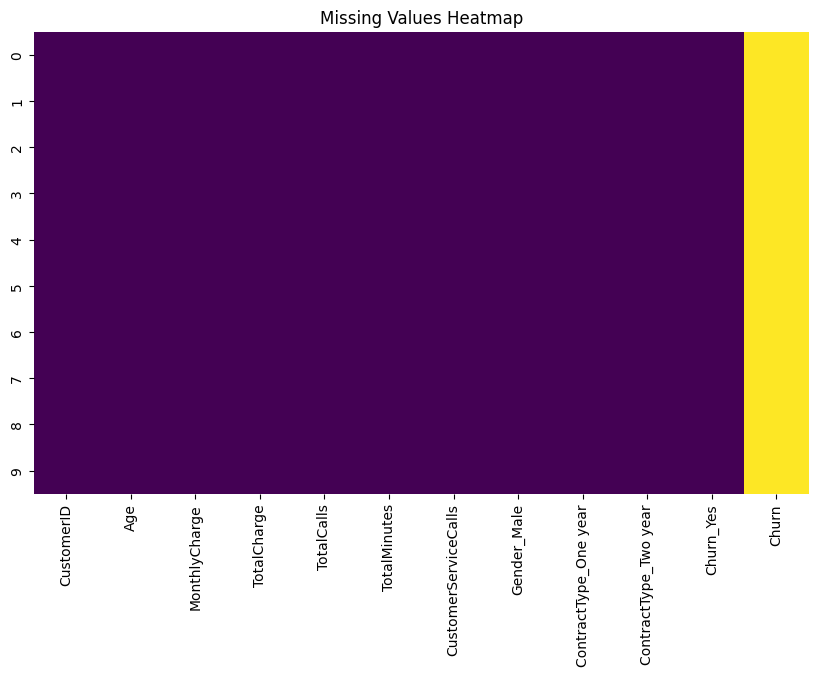

In [ ]:
# Heatmap for missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
# Drop irrelevant columns (e.g., 'customerID' if not needed)
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)



In [ ]:
 #Fill or drop missing values (as needed)
df.dropna(inplace=True)



In [ ]:
# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)



In [ ]:
# Convert categorical variables to numeric using one-hot encoding
# Exclude 'TotalCharges' from the columns to be one-hot encoded
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'TotalCharges']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
# Check if 'Churn' column exists, if not, try variations or create it
if 'Churn' not in df.columns:
    # Check for possible variations like 'churn' due to case sensitivity
    if 'churn' in df.columns:
        df['Churn'] = df['churn']  # Rename to 'Churn' if found
        df.drop('churn', axis=1, inplace=True) # Drop the old column
    else:
        # If not found, handle the situation (e.g., raise an error, create the column)
        # For example, you could create a default 'Churn' column with all values set to 0:
        df['Churn'] = 0  # Or handle as appropriate for your data

# Now proceed with your original code:
df['Churn'] = df['Churn'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})

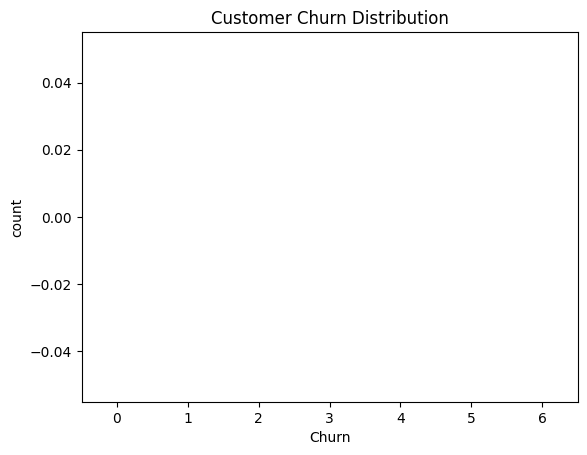

In [ ]:
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show(5,7)


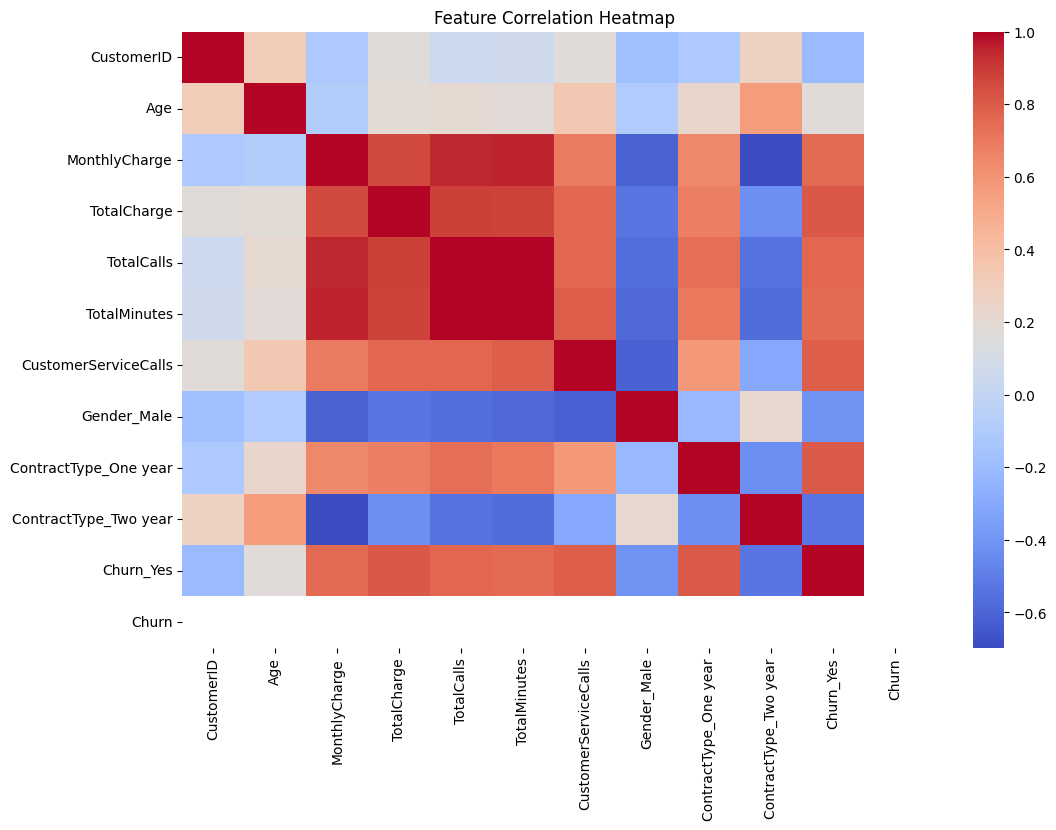

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
